# **Customer Lifetime Value**

## Ahmad Miqdam Nur Amany 


## **Business Problem Understanding**

#### ***Context***

*Customer* *Lifetime Value* (CLV) adalah sebuah total revenue yang dihasilkan oleh *customer* kepada perusahaan selama durasi tertentu yang sudah disepakati ataupun diperkirakan. CLV merupakan salah satu aspek penilaian seberapa berharga sebuah *customer* bagi perusahaan.

*Customer Lifetime Value* (CLV) menjadi dasar penting bagi perusahaan asuransi otomotif karena biaya akuisisi *customer* di industri ini cukup tinggi dan pola retensi sangat menentukan profitabilitas jangka panjang. Dengan menghitung CLV, perusahaan bisa memahami berapa besar revenue yang realistis dihasilkan seorang pemegang polis selama masa kontrak dan berapa banyak biaya yang layak dikeluarkan untuk mempertahankan mereka. 

Dalam kondisi pasar yang kompetitif dan churn yang mudah terjadi, CLV membantu perusahaan menargetkan segmen *customer* yang benar, menyesuaikan strategi pemasaran, serta mengoptimalkan distribusi resource agar setiap keputusan berbasis pada nilai jangka panjang, bukan transaksi sesaat.



#### ***Problem Statement***

Umumnya perusahaan asuransi otomotif tidak memiliki pemahaman yang jelas tentang nilai jangka panjang setiap *customer*. Mereka hanya mengandalkan usaha mereka dalam mengerahkan waktu dan biaya kepada seluruh *customer* nya tanpa melihat segmen pasarnya. Akibatnya, resource untuk marketing, waktu tim, dan biaya retention sering tidak dialokasikan secara efektif. Tanpa pemanfaatan CLV yang baik, perusahaan kesulitan menargetkan segmen *customer* yang benar, sulit membangun hubungan berkelanjutan, dan berisiko mengalami churn yang sebenarnya dapat dicegah.

#### ***Goals***

Menggunakan data CLV dengan tepat dapat membantu perusahaan memiliki benefit seperti:
1. Keuntungan yang stabil dengan mengoptimasi target market
2. Menghemat waktu yang dikerahkan kepada *customer* yang memiliki CLV tinggi lebih optimal dalam upaya upselling produk
3. Menghemat biaya yang dikerahkan untuk marketing dan retention kepada *customer* dengan segmentasi yang dapat menghasilkan revenue tertinggi
4. Membangun long-lasting connection dengan *customer* sesuai dengan market dari masing-masing segmennya.
5. Menurunkan churn dengan memahami karakter masing-masing *customer*

#### ***Analytic Approach***

Analisis dimulai dengan memetakan karakteristik customer berdasarkan fitur-fitur yang tersedia. Tujuannya adalah mengidentifikasi pola nilai jangka panjang customer, serta memahami kelompok mana yang cenderung memberikan kontribusi terbesar terhadap profit perusahaan.

Setelah struktur datanya dipahami, model prediksi CLV akan dikembangkan menggunakan pendekatan regresi atau machine learning. Model ini difungsikan untuk mengestimasi nilai CLV secara lebih akurat, terutama bagi customer baru atau customer yang belum menunjukkan pola perilaku lengkap. 

#### ***Metric Evaluation***

Kinerja model akan dievaluasi menggunakan RMSE, MAE, dan MAPE sebagai indikator utama. Ketiga metrik ini memberikan gambaran seberapa jauh prediksi CLV menyimpang dari nilai aktual, baik secara absolut maupun persentase. 

Jika model yang terpilih bersifat linear, evaluasi dapat dilengkapi dengan R-squared atau adjusted R-squared untuk melihat seberapa besar variasi CLV yang mampu dijelaskan oleh fitur yang digunakan. Untuk model non-linear, fokus evaluasi tetap diarahkan pada metrik error karena lebih representatif dalam mengukur ketepatan prediksi.

## **Data Understanding**

### Link to data
[Customer Lifetime Value](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ)






In [5]:
# Ensure all library are installed first
%pip install -q matplotlib seaborn pandas numpy
%pip install -q scikit-learn
%pip install -q scikit-optimize
%pip install -q tensorflow
%pip install -q keras
%pip install -q xgboost
%pip install -q lightbgm
%pip install -q catboost
%pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import all needed library to ensure smoothness of coding process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [7]:
# Data overview
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [8]:
# Check data type and description
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Setelah mengetahui tidak ada data null, kita tidak perlu menambahkan data ke kolom kosong. Sekarang lanjut ke proses menganalisis distribusi data apakah sudah terdistribusi normal atau belum.


In [9]:
# Show unique data in columns (object type)
for cols in df.columns:
  if df[cols].dtype == 'object':
    print(f"{cols} data: ")
    print(df[cols].value_counts())
    print('-'*20)

Vehicle Class data: 
Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64
--------------------
Coverage data: 
Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64
--------------------
Renew Offer Type data: 
Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64
--------------------
EmploymentStatus data: 
EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64
--------------------
Marital Status data: 
Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64
--------------------
Education data: 
Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: coun

Dataset ini terbagi menjadi 2 tipe data:
1. Kategorikal (Vehicle Class, Coverage, Renew Offer Type, EmplotmentStatus, Marital Stauts, Education)
2. Numerikal (Number of Policies, Monthly Premium Auto, Total Claim Amount, Income)

Target dari data ini juga adalah float, sehingga analisis yang akan kita lakukan adalah menggunakan pendekatan regression

In [10]:
# Cek dengan metode statistika Kolmogorov-Smirnov Test dan mengintrepetasikan p-value nya
from scipy.stats import kstest

for cols in df.select_dtypes(include='number').columns:
    stat, pvalue = kstest(df[cols], 'norm')
    if pvalue > 0.05:
      print(f'{cols} memiliki p-value={pvalue:.4f}, kita mengasumsikan data terdistribusi normal\n')
    else:
      print(f'{cols} memiliki p-value={pvalue:.4f}, kita mengasumsikan data TIDAK terdistribusi normal\n')

Number of Policies memiliki p-value=0.0000, kita mengasumsikan data TIDAK terdistribusi normal

Monthly Premium Auto memiliki p-value=0.0000, kita mengasumsikan data TIDAK terdistribusi normal

Total Claim Amount memiliki p-value=0.0000, kita mengasumsikan data TIDAK terdistribusi normal

Income memiliki p-value=0.0000, kita mengasumsikan data TIDAK terdistribusi normal

Customer Lifetime Value memiliki p-value=0.0000, kita mengasumsikan data TIDAK terdistribusi normal



Karena seluruh data numerik tidak terdistribusi normal, kita perlu memberikan suatu perlakuan terhadap data agar bisa memberikan hasil terbaik. Kita analisa terlebih dahulu bagaimana jenis sebaran datanya.

1. Descriptive Statistics

In [11]:
display(df.describe())
display(df.describe(include=object))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [12]:
# analisis descriptive statistics
for cols in df.select_dtypes(include='number').columns:
    print(f'Mean {cols}:',df[cols].mean())
    print(f'Median {cols}:',df[cols].median())
    print()

Mean Number of Policies: 2.979361439407303
Median Number of Policies: 2.0

Mean Monthly Premium Auto: 93.0269888869289
Median Monthly Premium Auto: 82.0

Mean Total Claim Amount: 431.4071030483331
Median Total Claim Amount: 379.2

Mean Income: 37868.188569412596
Median Income: 34322.0

Mean Customer Lifetime Value: 8029.874591946198
Median Customer Lifetime Value: 5800.188903



Karena seluruh kolom numerik memiliki rata-rata (mean) > median, sebaran datanya adalah right skewed

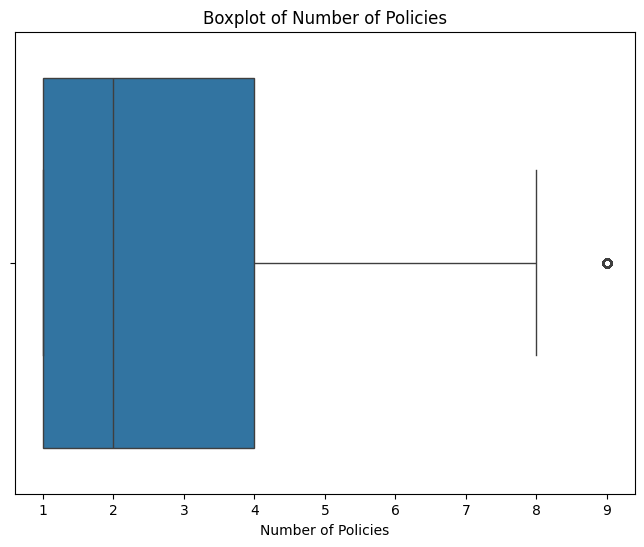

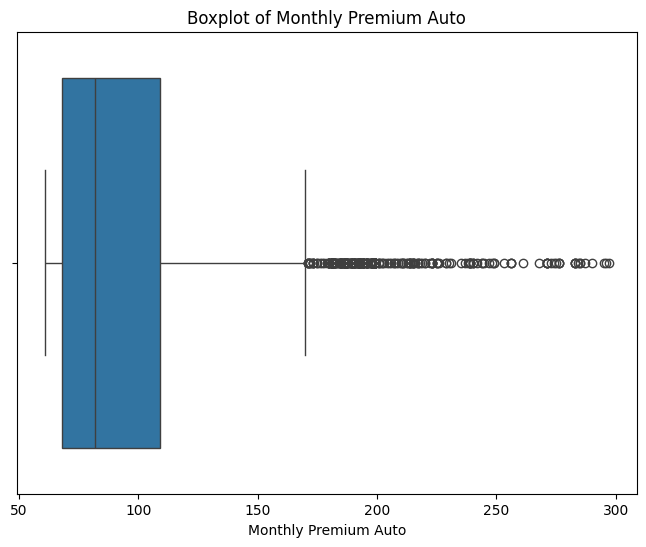

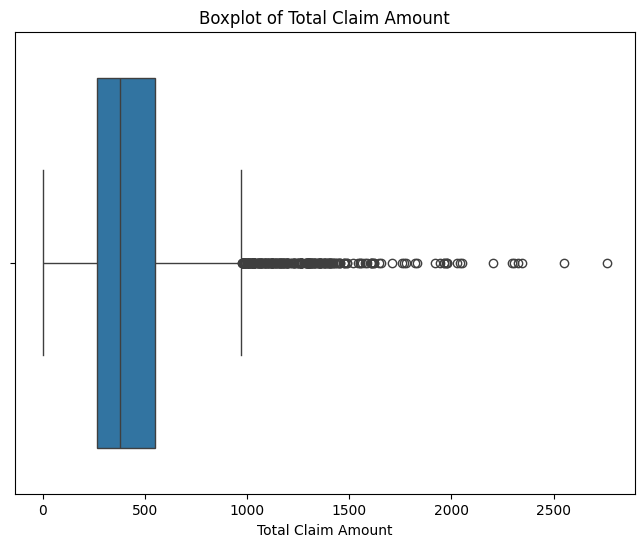

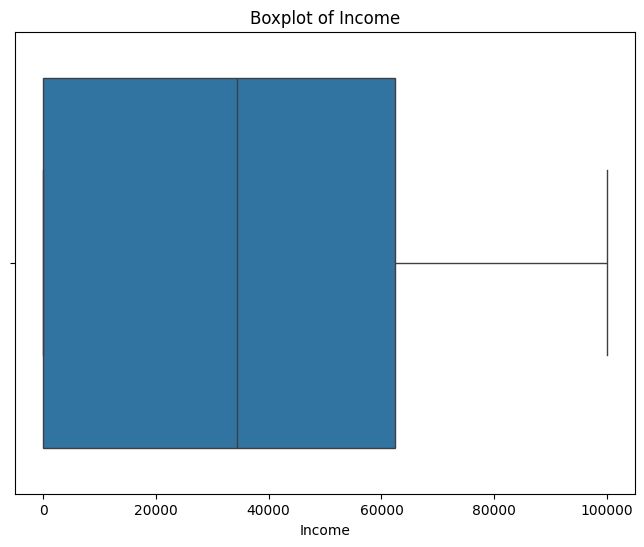

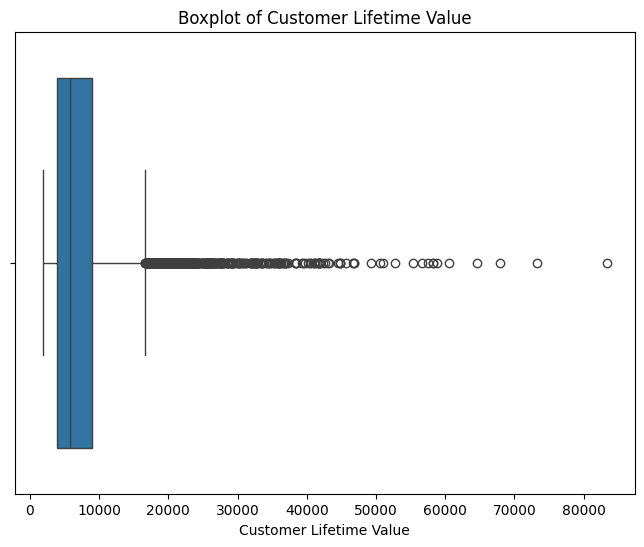

In [13]:
# check boxplot for outlier detection
for cols in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

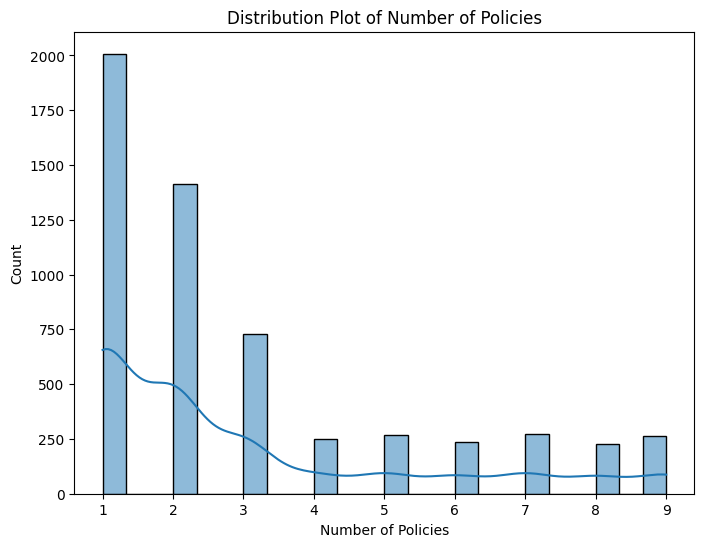

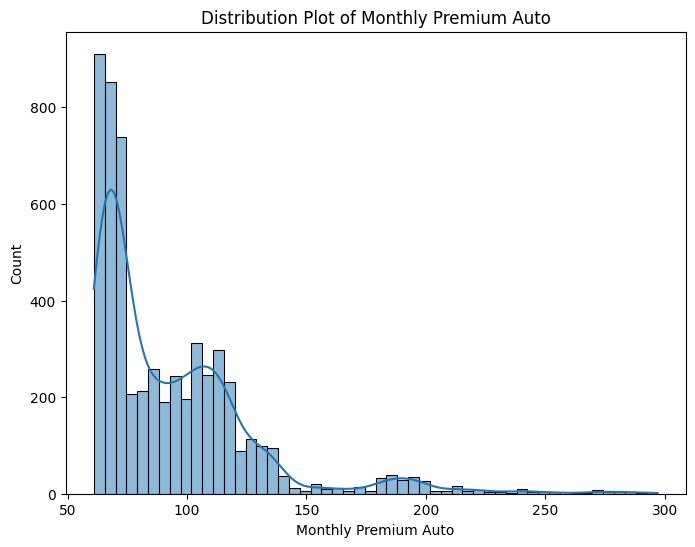

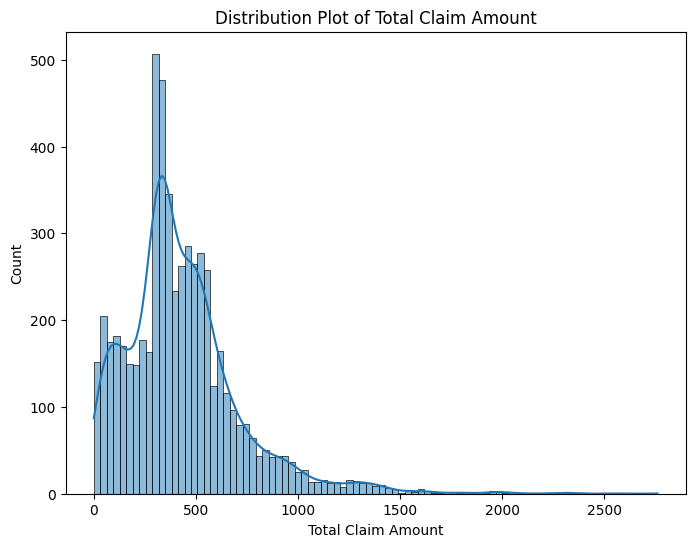

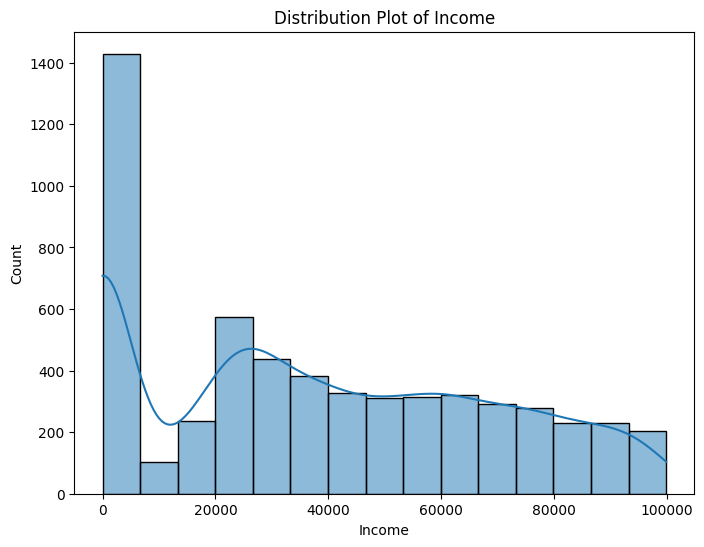

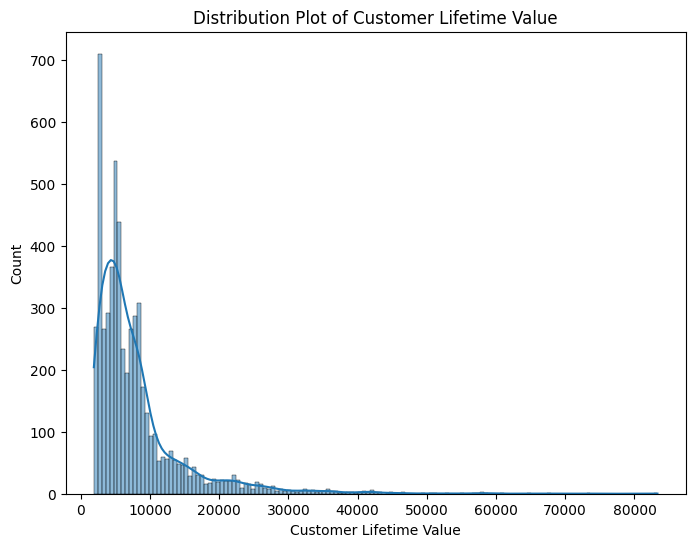

In [14]:
# check distribution plot
for cols in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[cols], kde=True)
    plt.title(f'Distribution Plot of {cols}')
    plt.show()

Untuk menormalisasi data yang kita miliki, kita akan memberi perlakuan **logaritmic transformation** untuk mengurangi skewness dari data kita agar dapat lebih merepresentasikan data yang lebih mendekati untuk memiliki distribusi normal.

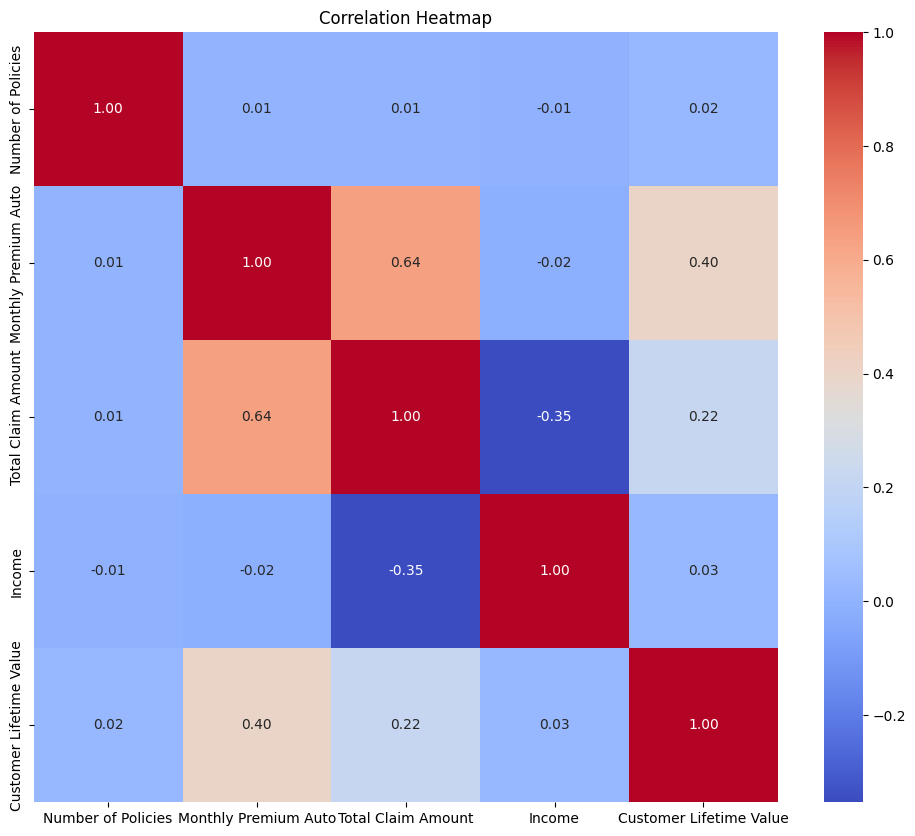

In [15]:
# check correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering - Categorical Data

Feature Engineering akan dilakukan untuk memperkaya fitur dalam data dan mencegah outlier merusak data keseluruhan. Untuk data kategorikal pertama akan kita klasifikasikan seperti ini:

1. Vehicle Class

    Pembagian menjadi kelas mobil berdasarkan tipenya:
    - Reguler Car (Four-Door Car, Two-Door Car, SUV)
    - Special Car (Sports Car, Luxury SUV, Luxury Car)

2. Coverage Data

    Pembagian menggunakan ordinal labeling berdasarkan coverage insurance:
    - Basic = 1
    - Extended = 2
    - Premium = 3

3. Renew Offer Type

    Pembagian menggunakan masing-masing Offer kita asumsikan merupakan urutan berdasarkan marketing yang dijalankan, sehingga untuk model ini akan kita gunakan ordinal encoding
    - Offer 1 = 1
    - Offer 2 = 2
    - Offer 3 = 3
    - Offer 4 = 4

4. Employment Status

    Pembagian data akan kita gunakan masing-masing saja:
    - Employed
    - Unemployed
    - Medical Leave
    - Disabled
    - Retired

5. Marital Status

    Pembagian data akan menggunakan masing-masing:
    - Divorce
    - Single
    - Married

6. Education data

    - High School or Below  = 1  
    - College = 2
    - Bachelor = 3
    - Master = 4             
    - Doctor = 5


Feature Engineering - Numerical Data

Lalu untuk data numerikal akan kita lakukan beberapa adjustment supaya bisa memiliki korelasi yang lebih baik ke CLV.

1. Number of Policies (r = 0.02)

    Data ini memiliki korelasi yang sangat lemah terhadap CLV. Kita akan tetap membiarkan sebagai data kontinu.

2. Monthly Premium Auto (r = 0.40)
    
    Data ini akan kita lakukan logaritmic transformation karena pola data right-skewed. Akan kita beri perlakuan log(x+1) untuk menyeimbangkan dengan data lain

3. Total Claim Amount (r = 0.22)

    Data ini akan kita lakukan logaritmic transformation karena pola data right-skewed. Akan kita beri perlakuan log(x+1) karena ada data yang mendekati 0 yang bisa memberikan negatif

4. Income (r= 0.03)

    Data ini akan kita lakukan logaritmic transformation karena pola data right-skewed. Akan kita beri perlakuan log(x+1) karena ada data yang 0 yang bisa memberikan nilai infinite

5. Customer Lifetime Value

    Data ini akan kita lakukan logaritmic transformation karena pola data right-skewed. Akan kita beri perlakuan log(x+1) karena distribusi right-skewed yang parah.




In [38]:
# Feature engineering and encoding with zero data leakage by separating train and test datasets first
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

# Split before any encoding or transformation
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Log transformation (fit on train, apply to both)
def log_transform(df, cols):
    df_log = df.copy()
    for col in cols:
        df_log[f'Log_{col}'] = np.log1p(df_log[col])
    return df_log

num_cols = [col for col in df_train.select_dtypes(include='number').columns if col != 'Number of Policies']
df_train_log = log_transform(df_train, num_cols)
df_test_log = log_transform(df_test, num_cols)

# Ordinal encoding
encoder_cover = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
encoder_offer = OrdinalEncoder(categories=[['Offer1', 'Offer2', 'Offer3', 'Offer4']])
encoder_education = OrdinalEncoder(categories=[['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']])

df_train_log['Coverage_encoded'] = encoder_cover.fit_transform(df_train[['Coverage']])
df_test_log['Coverage_encoded'] = encoder_cover.transform(df_test[['Coverage']])

df_train_log['Renew Offer Type_encoded'] = encoder_offer.fit_transform(df_train[['Renew Offer Type']])
df_test_log['Renew Offer Type_encoded'] = encoder_offer.transform(df_test[['Renew Offer Type']])

df_train_log['Education_encoded'] = encoder_education.fit_transform(df_train[['Education']])
df_test_log['Education_encoded'] = encoder_education.transform(df_test[['Education']])

# One-hot encoding (fit on train, align columns for test)
df_train_log["Special_Vehicle Class"] = df_train["Vehicle Class"].isin(["Sports Car", "Luxury Car", "Luxury SUV"]).astype(int)
df_test_log["Special_Vehicle Class"] = df_test["Vehicle Class"].isin(["Sports Car", "Luxury Car", "Luxury SUV"]).astype(int)

df_train_encoded = pd.get_dummies(
    df_train_log,
    columns=['EmploymentStatus', 'Marital Status'],
    prefix=['employment', 'marital'],
    dtype=int
    )
df_test_encoded = pd.get_dummies(
    df_test_log,
    columns=['EmploymentStatus', 'Marital Status'],
    prefix=['employment', 'marital'],
    dtype=int
    )

# Align columns (fill missing columns in test with 0)
df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

# Drop old columns
drop_cols = ['Education', 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']
df_train_encoded.drop(drop_cols, axis=1, inplace=True)
df_test_encoded.drop(drop_cols, axis=1, inplace=True)

Periksa kembali untuk distribusi datanya

In [19]:
# Compare distribution stats and label which dataset is train/test
list_df_encoded = [('train', df_train_encoded), ('test', df_test_encoded)]
log_num_cols = ['Log_Monthly Premium Auto', 'Log_Total Claim Amount', 'Log_Income', 'Log_Customer Lifetime Value']

for col in log_num_cols:
    print(col)
    for name, df_enc in list_df_encoded:
        mean_val = df_enc[col].mean()
        med_val = df_enc[col].median()
        print(f"Dataset = {name} | Mean: {mean_val:.4f} | Median: {med_val:.4f}")
    print()

Log_Monthly Premium Auto
Dataset = train | Mean: 4.4918 | Median: 4.4188
Dataset = test | Mean: 4.4901 | Median: 4.4188

Log_Total Claim Amount
Dataset = train | Mean: 5.7900 | Median: 5.9407
Dataset = test | Mean: 5.8106 | Median: 5.9456

Log_Income
Dataset = train | Mean: 8.0266 | Median: 10.4487
Dataset = test | Mean: 7.8955 | Median: 10.4265

Log_Customer Lifetime Value
Dataset = train | Mean: 8.7505 | Median: 8.6673
Dataset = test | Mean: 8.7448 | Median: 8.6589



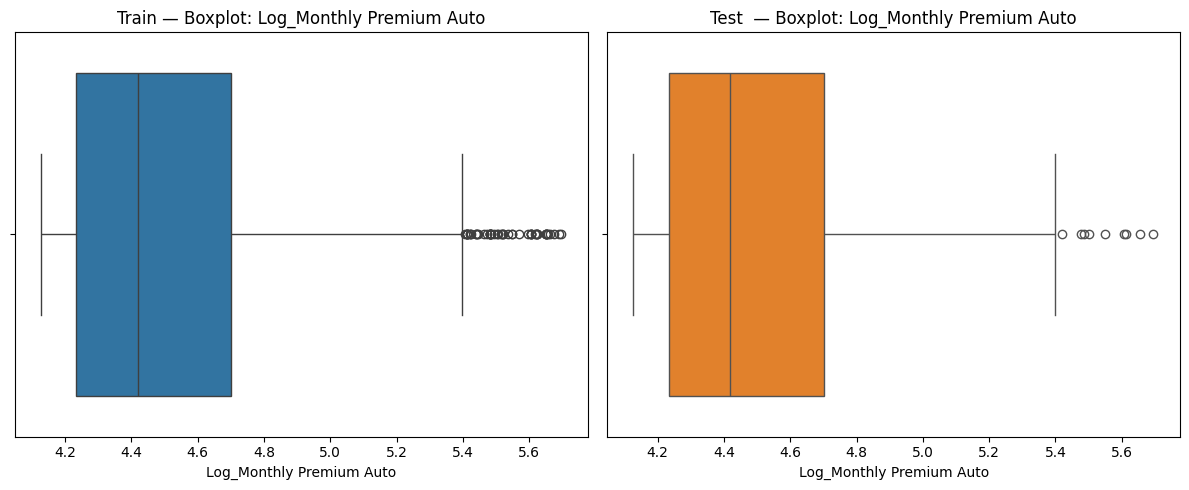

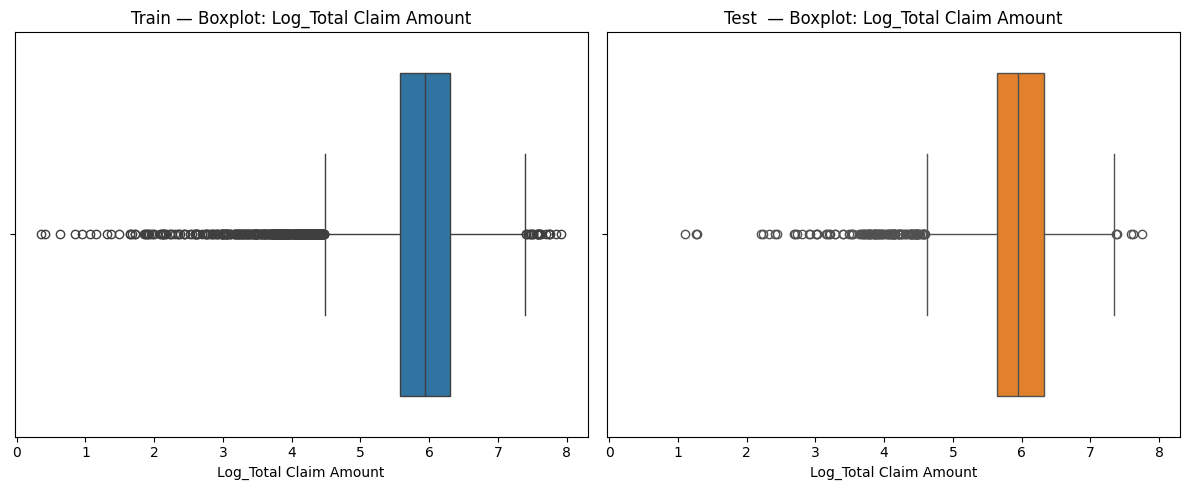

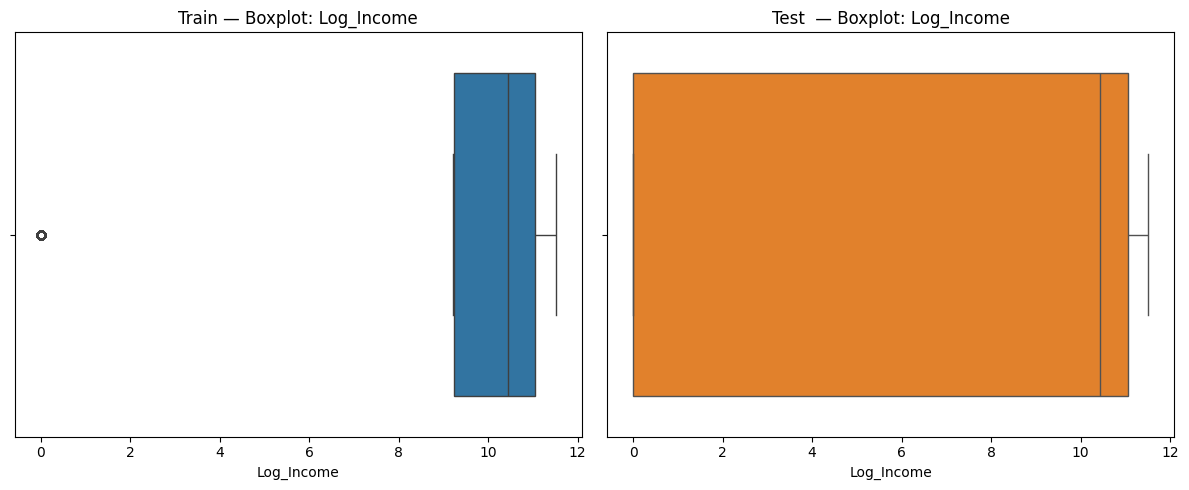

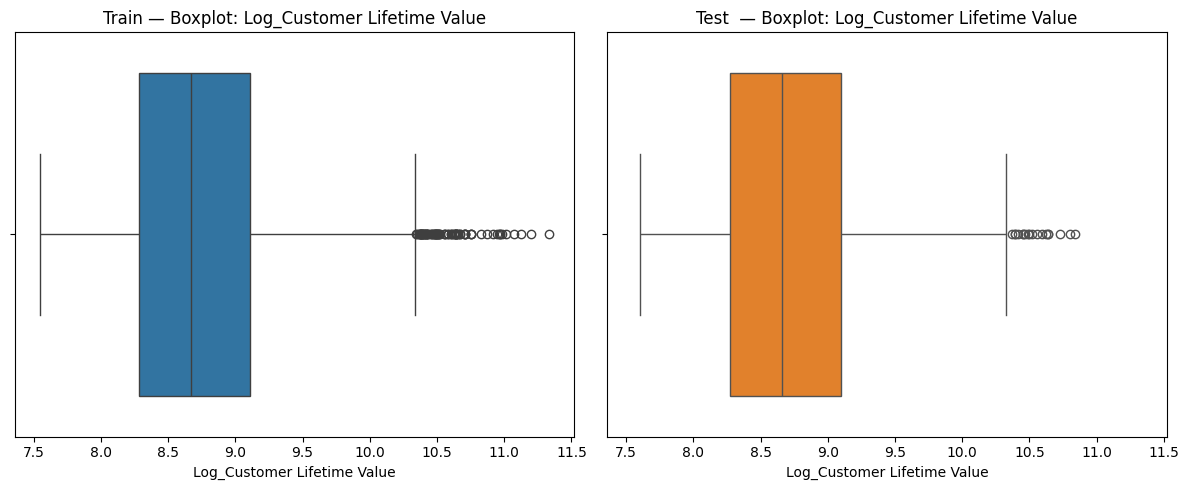

In [20]:
# check updated boxplot for outlier detection (side-by-side train vs test)
for col in log_num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)
    sns.boxplot(x=df_train_encoded[col], ax=axes[0], color='C0')
    axes[0].set_title(f'Train — Boxplot: {col}')
    sns.boxplot(x=df_test_encoded[col], ax=axes[1], color='C1')
    axes[1].set_title(f'Test  — Boxplot: {col}')
    plt.tight_layout()
    plt.show()

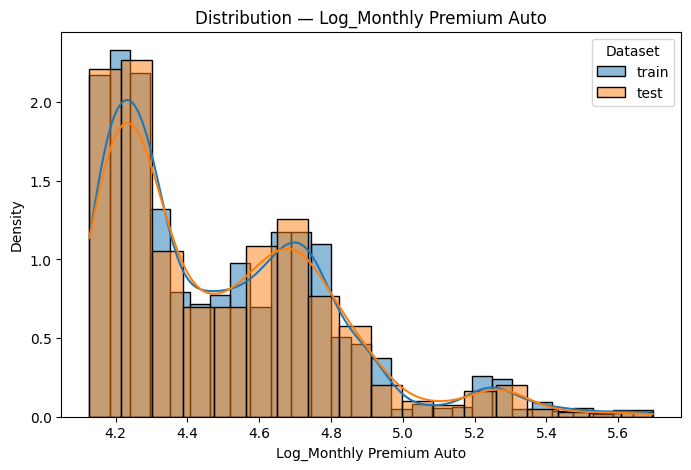

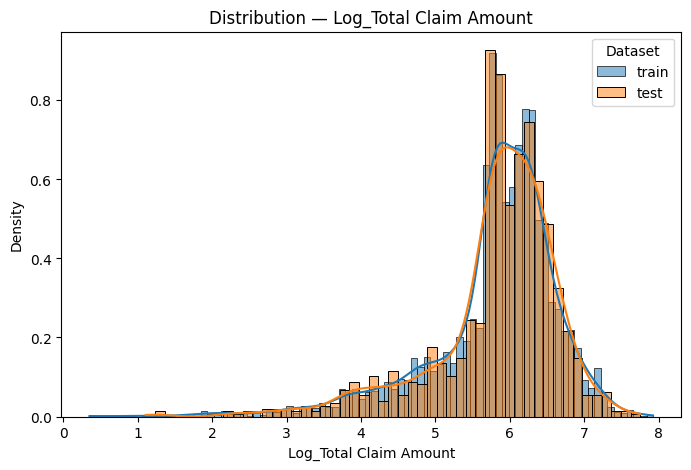

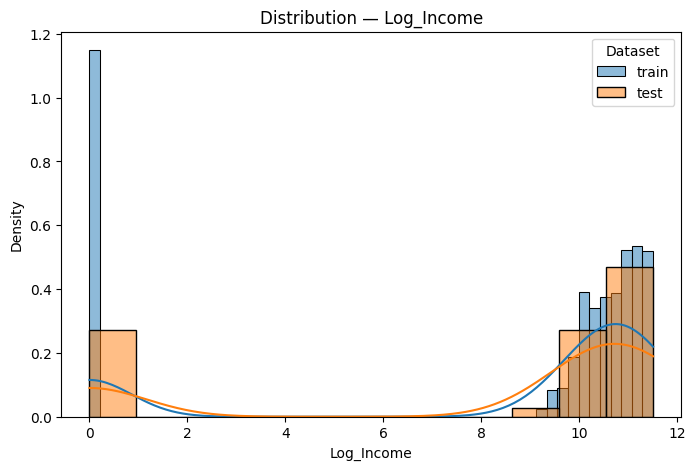

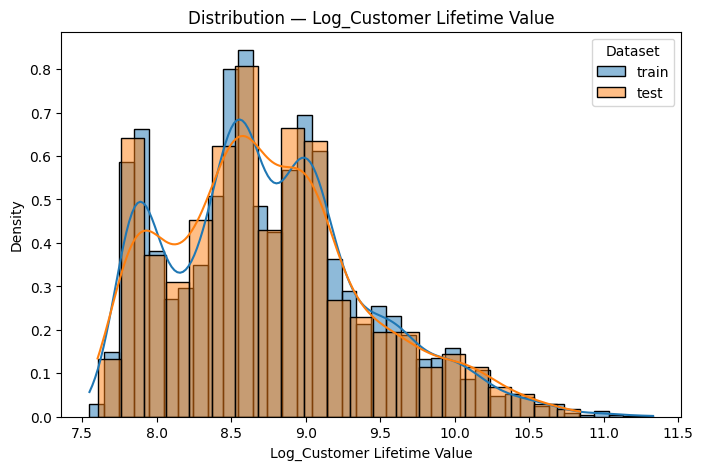

In [21]:
# check updated distribution plot (overlay train & test for easy comparison)
for col in log_num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df_train_encoded[col], kde=True, stat='density', color='C0', label='train', alpha=0.5)
    sns.histplot(df_test_encoded[col], kde=True, stat='density', color='C1', label='test', alpha=0.5)
    plt.title(f'Distribution — {col}')
    plt.legend(title='Dataset')
    plt.show()

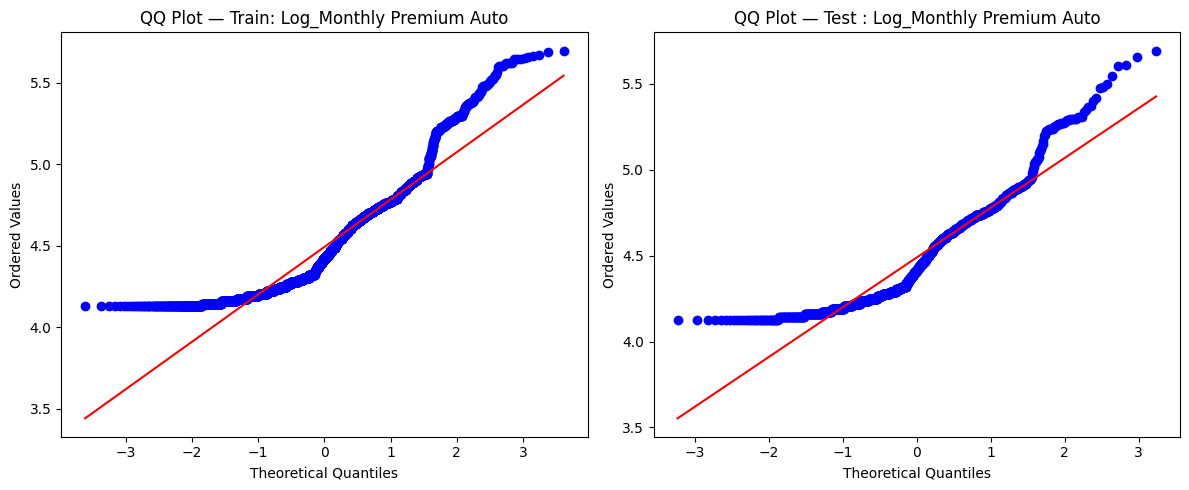

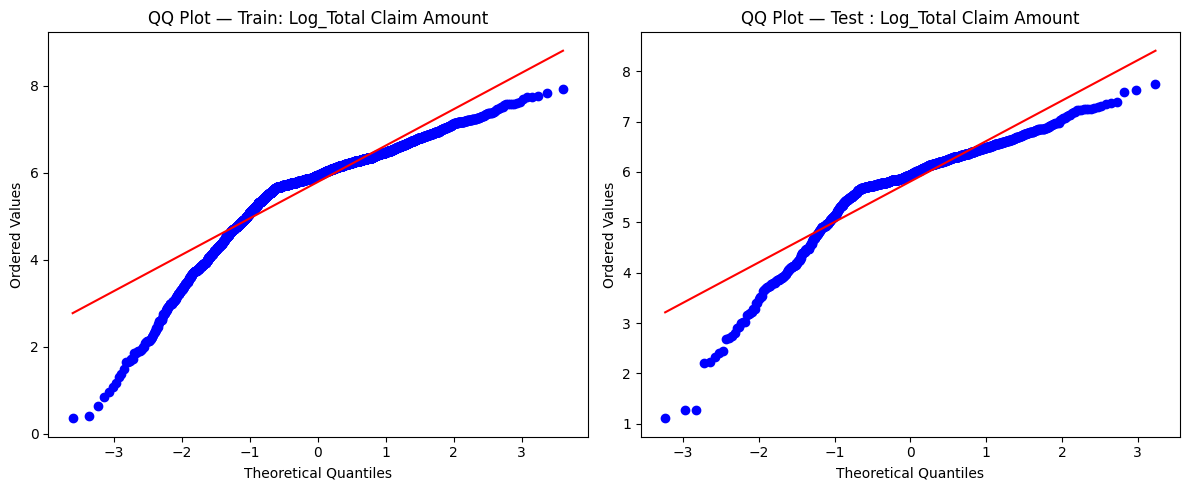

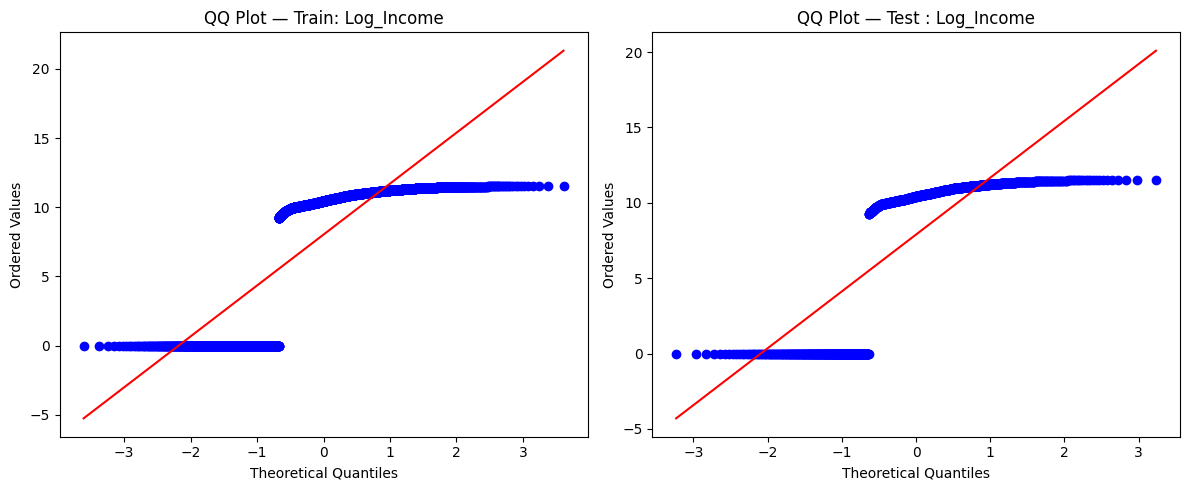

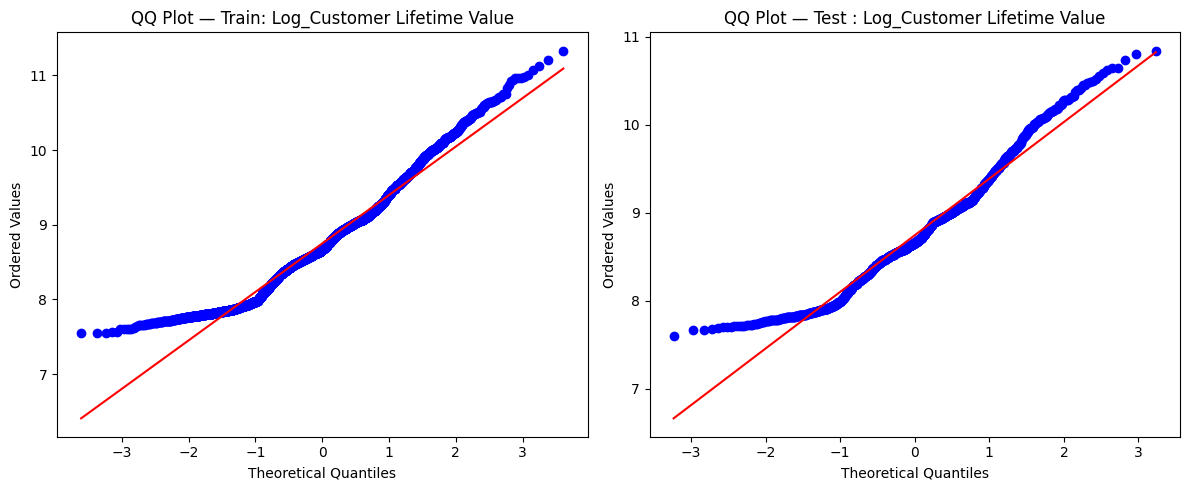

In [ ]:
# QQ-plots (Quantile-Quantile)
import scipy.stats as stats

for col in log_num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Train QQ
    stats.probplot(df_train_encoded[col].dropna(), dist="norm", plot=axes[0])
    axes[0].set_title(f"QQ Plot — Train: {col}")
    axes[0].set_xlabel('Theoretical Quantiles')
    axes[0].set_ylabel('Ordered Values')

    # Test QQ
    stats.probplot(df_test_encoded[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ Plot — Test : {col}")
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Ordered Values')

    plt.tight_layout()
    plt.show()

In [23]:
display(df_train_encoded.describe())
display(df_test_encoded.describe())

,Number of Policies,Log_Monthly Premium Auto,Log_Total Claim Amount,Log_Income,Log_Customer Lifetime Value,Coverage_encoded,Renew Offer Type_encoded,Education_encoded,Special_Vehicle Class,Multiple_Number of Policies,employment_Disabled,employment_Employed,employment_Medical Leave,employment_Retired,employment_Unemployed,marital_Divorced,marital_Married,marital_Single
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,3.012348,4.491826,5.789966,8.026595,8.750488,0.471665,0.989416,1.302977,0.091510,0.647409,0.047189,0.626020,0.046086,0.031092,0.249614,0.151268,0.580595,0.268137
std,2.415183,0.306776,0.891555,4.654029,0.658469,0.647705,1.015918,1.091503,0.288365,0.477829,0.212065,0.483912,0.209694,0.173584,0.432837,0.358349,0.493516,0.443038
min,1.000000,4.127134,0.352985,0.000000,7.549087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.234107,5.574712,9.225269,8.285383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.418841,5.940697,10.448686,8.667324,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,4.700480,6.306640,11.042162,9.109544,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,5.697093,7.923274,11.512275,11.330520,2.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Number of Policies,Log_Monthly Premium Auto,Log_Total Claim Amount,Log_Income,Log_Customer Lifetime Value,Coverage_encoded,Renew Offer Type_encoded,Education_encoded,Special_Vehicle Class,Multiple_Number of Policies,employment_Disabled,employment_Employed,employment_Medical Leave,employment_Retired,employment_Unemployed,marital_Divorced,marital_Married,marital_Single
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,2.847443,4.490119,5.810624,7.895479,8.744808,0.477072,0.947090,1.270723,0.100529,0.639330,0.033510,0.619048,0.051146,0.034392,0.261905,0.144621,0.592593,0.262787
std,2.299432,0.304094,0.857825,4.729356,0.652653,0.655551,0.974895,1.069470,0.300837,0.480407,0.180043,0.485835,0.220393,0.182313,0.439865,0.351873,0.491569,0.440342
min,1.000000,4.127134,1.107976,0.000000,7.603574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.234107,5.642956,0.000000,8.271062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.418841,5.945589,10.426543,8.658859,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,4.700480,6.331090,11.046769,9.097904,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9.000000,5.693732,7.752836,11.511384,10.839916,2.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


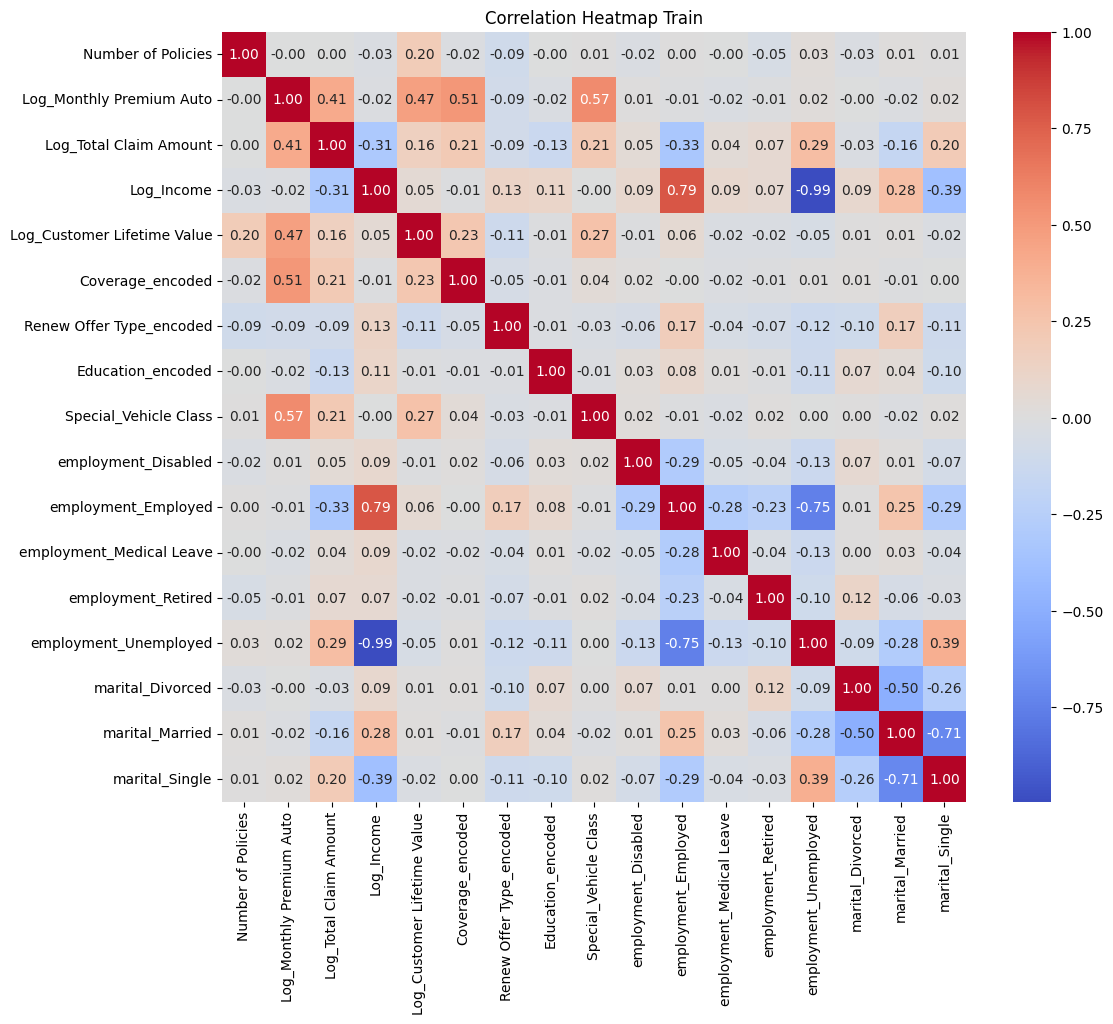

In [51]:
# check correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_train_encoded.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap Train')
plt.show()

Customer Lifetime Value memiliki korelasi yang cukup berarti dengan Monthly Premium Auto dan Special Vehicle, hal ini selaras dengan jika memiliki tagihan insurance yang lebih mahal atau jenis mobil yang lebih mahal akan selaras dengan CLV yang lebih tinggi

Training

In [39]:
X_test = df_test_encoded.drop('Log_Customer Lifetime Value', axis=1)
y_test = df_test_encoded['Log_Customer Lifetime Value']
X_train = df_train_encoded.drop('Log_Customer Lifetime Value', axis=1)
y_train = df_train_encoded['Log_Customer Lifetime Value']

In [26]:
# create baseline model for CLV
mean_pred_value = y_train.mean()
baseline_pred_train = np.full(shape=y_train.shape, fill_value=mean_pred_value)
mean_pred_value_test = y_test.mean()
baseline_pred_test = np.full(shape=y_test.shape, fill_value=mean_pred_value_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression

# Baseline evaluation
mae_baseline_train = mean_absolute_error(y_train, baseline_pred_train)
rmse_baseline_train = mean_squared_error(y_train, baseline_pred_train)
mae_baseline_test = mean_absolute_error(y_test, baseline_pred_test)
rmse_baseline_test = mean_squared_error(y_test, baseline_pred_test)

print(f"""
Baseline Evaluation - Test data
Mean Absolute Error (MAE) = {mae_baseline_test:.2f},
Mean Squared Error (MSE) = {mean_squared_error(y_test, baseline_pred_test):.2f},
Root Mean Squared Error (RMSE) = {rmse_baseline_test:.2f},
Mean Average Percentage Error (MAPE) = {mean_absolute_percentage_error(y_test, baseline_pred_test):.2f},
R-squared (R2) = {r2_score(y_test, baseline_pred_test):.2f}
""")

print(f"""
Baseline Evaluation - Train data
Mean Absolute Error (MAE) = {mae_baseline_train:.2f},
Mean Squared Error (MSE) = {mean_squared_error(y_train, baseline_pred_train):.2f},
Root Mean Squared Error (RMSE) = {rmse_baseline_train:.2f},
Mean Average Percentage Error (MAPE) = {mean_absolute_percentage_error(y_train, baseline_pred_train):.2f},
R-squared (R2) = {r2_score(y_train, baseline_pred_train):.2f}
""")

# Linear Regression evaluation
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# predictions
y_test_predict = model_lr.predict(X_test)
y_train_predict = model_lr.predict(X_train)

# compute metrics
mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = mean_squared_error(y_test, y_test_predict)
mape_test = mean_absolute_percentage_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = mean_squared_error(y_train, y_train_predict)
mape_train = mean_absolute_percentage_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

print(f""" Evaluation of Test data
Mean Absolute Error (MAE) = {mae_test:.2f},
Mean Squared Error (MSE) = {mse_test:.2f},
Root Mean Squared Error (RMSE) = {rmse_test:.2f},
Mean Average Percentage Error (MAPE) = {mape_test:.2f},
R-squared (R2) = {r2_test:.2f}
""")

print(f""" Evaluation of Train data
Mean Absolute Error (MAE) = {mae_train:.2f},
Mean Squared Error (MSE) = {mse_train:.2f},
Root Mean Squared Error (RMSE) = {rmse_train:.2f},
Mean Average Percentage Error (MAPE) = {mape_train:.2f},
R-squared (R2) = {r2_train:.2f}
""")


Baseline Evaluation - Test data
Mean Absolute Error (MAE) = 0.52,
Mean Squared Error (MSE) = 0.43,
Root Mean Squared Error (RMSE) = 0.43,
Mean Average Percentage Error (MAPE) = 0.06,
R-squared (R2) = 0.00


Baseline Evaluation - Train data
Mean Absolute Error (MAE) = 0.53,
Mean Squared Error (MSE) = 0.43,
Root Mean Squared Error (RMSE) = 0.43,
Mean Average Percentage Error (MAPE) = 0.06,
R-squared (R2) = 0.00

 Evaluation of Test data
Mean Absolute Error (MAE) = 0.18,
Mean Squared Error (MSE) = 0.08,
Root Mean Squared Error (RMSE) = 0.08,
Mean Average Percentage Error (MAPE) = 0.02,
R-squared (R2) = 0.81

 Evaluation of Train data
Mean Absolute Error (MAE) = 0.18,
Mean Squared Error (MSE) = 0.08,
Root Mean Squared Error (RMSE) = 0.08,
Mean Average Percentage Error (MAPE) = 0.02,
R-squared (R2) = 0.81



/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Ma

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
}

# Train and evaluate
for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)

        # test metrics
        mae_test = mean_absolute_error(y_test, y_test_predict)
        mse_test = mean_squared_error(y_test, y_test_predict)
        rmse_test = np.sqrt(mse_test)
        mape_test = mean_absolute_percentage_error(y_test, y_test_predict)
        r2_test = r2_score(y_test, y_test_predict)

        # train metrics
        mae_train = mean_absolute_error(y_train, y_train_predict)
        mse_train = mean_squared_error(y_train, y_train_predict)
        rmse_train = np.sqrt(mse_train)
        mape_train = mean_absolute_percentage_error(y_train, y_train_predict)
        r2_train = r2_score(y_train, y_train_predict)

        print(f"-- {name} --")
        print(f""" Evaluation of Test data
Mean Absolute Error (MAE) = {mae_test:.2f},
Mean Squared Error (MSE) = {mse_test:.2f},
Root Mean Squared Error (RMSE) = {rmse_test:.2f},
Mean Average Percentage Error (MAPE) = {mape_test:.2f},
R-squared (R2) = {r2_test:.2f}
""")

        print(f""" Evaluation of Train data
Mean Absolute Error (MAE) = {mae_train:.2f},
Mean Squared Error (MSE) = {mse_train:.2f},
Root Mean Squared Error (RMSE) = {rmse_train:.2f},
Mean Average Percentage Error (MAPE) = {mape_train:.2f},
R-squared (R2) = {r2_train:.2f}
""")

/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Machine Learning Analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ahmadmiqdam/Desktop/Customer Lifetime Value - Ma

-- Linear Regression --
 Evaluation of Test data
Mean Absolute Error (MAE) = 0.44,
Mean Squared Error (MSE) = 0.32,
Root Mean Squared Error (RMSE) = 0.56,
Mean Average Percentage Error (MAPE) = 0.05,
R-squared (R2) = 0.25

 Evaluation of Train data
Mean Absolute Error (MAE) = 0.43,
Mean Squared Error (MSE) = 0.32,
Root Mean Squared Error (RMSE) = 0.56,
Mean Average Percentage Error (MAPE) = 0.05,
R-squared (R2) = 0.27

-- Random Forest --
 Evaluation of Test data
Mean Absolute Error (MAE) = 0.10,
Mean Squared Error (MSE) = 0.04,
Root Mean Squared Error (RMSE) = 0.20,
Mean Average Percentage Error (MAPE) = 0.01,
R-squared (R2) = 0.90

 Evaluation of Train data
Mean Absolute Error (MAE) = 0.03,
Mean Squared Error (MSE) = 0.01,
Root Mean Squared Error (RMSE) = 0.08,
Mean Average Percentage Error (MAPE) = 0.00,
R-squared (R2) = 0.99

-- Random Forest --
 Evaluation of Test data
Mean Absolute Error (MAE) = 0.10,
Mean Squared Error (MSE) = 0.04,
Root Mean Squared Error (RMSE) = 0.20,
Mean Av

Berdasarkan perbandingan yang sudah dilakukan, kita akan menggunakan CatBoost karena memiliki dasar yang lebih tinggi dibanding kedua model lainnya.

In [42]:
# Bayesian optimization for CatBoostRegressor (find best hyperparameters)
from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Define search space for CatBoost 
search_spaces = {
    'iterations': Integer(100, 1500),
    'depth': Integer(3, 8),
    'learning_rate': Real(1e-3, 0.1, prior='log-uniform'),
    'l2_leaf_reg': Real(1, 1000, prior='log-uniform'),
    'border_count': Integer(32, 128),
}

cb = CatBoostRegressor(random_state=42, verbose=0, thread_count=-1)

# Use negative MSE as the optimization objective for BayesSearchCV
bayes_cv = BayesSearchCV(
    estimator=cb,
    search_spaces=search_spaces,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
)

bayes_cv.fit(X_train, y_train)

# Best parameters and CV score
best_params = bayes_cv.best_params_
best_cv_neg_mse = bayes_cv.best_score_
best_cv_mse = -best_cv_neg_mse
best_cv_rmse = np.sqrt(best_cv_mse)

print('\nBest parameters found:')
for k, v in best_params.items():
    print(' -', k, ':', v)
print(f'Best CV MSE (estimated): {best_cv_mse:.4f}')
print(f'Best CV RMSE (estimated): {best_cv_rmse:.4f}')

# Evaluate on test and train set
cb_tuned = bayes_cv.best_estimator_
y_test_predict = cb_tuned.predict(X_test)
y_train_predict = cb_tuned.predict(X_train)

mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)

mae_train = mean_absolute_error(y_train, y_train_predict)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

print(f""" Tuned CatBoost Evaluation of Test data
Mean Absolute Error (MAE) = {mae_test:.4f},
Mean Squared Error (MSE) = {mse_test:.4f},
Root Mean Squared Error (RMSE) = {rmse_test:.4f},
Mean Average Percentage Error (MAPE) = {mape_test:.4f},
R-squared (R2) = {r2_test:.4f}
""")

print(f""" Tuned CatBoost Evaluation of Train data
Mean Absolute Error (MAE) = {mae_train:.4f},
Mean Squared Error (MSE) = {mse_train:.4f},
Root Mean Squared Error (RMSE) = {rmse_train:.4f},
Mean Average Percentage Error (MAPE) = {mape_train:.4f},
R-squared (R2) = {r2_train:.4f}
""")


Best parameters found:
 - border_count : 128
 - depth : 8
 - iterations : 1196
 - l2_leaf_reg : 1.0
 - learning_rate : 0.008115076708883017
Best CV MSE (estimated): 0.0420
Best CV RMSE (estimated): 0.2049
 Tuned CatBoost Evaluation of Test data
Mean Absolute Error (MAE) = 0.1076,
Mean Squared Error (MSE) = 0.0397,
Root Mean Squared Error (RMSE) = 0.1993,
Mean Average Percentage Error (MAPE) = 0.0115,
R-squared (R2) = 0.9066

 Tuned CatBoost Evaluation of Train data
Mean Absolute Error (MAE) = 0.0862,
Mean Squared Error (MSE) = 0.0280,
Root Mean Squared Error (RMSE) = 0.1673,
Mean Average Percentage Error (MAPE) = 0.0092,
R-squared (R2) = 0.9354



In [48]:
# Convert log-scale predictions back to original CLV scale using inverse transformation
y_test_predict_original = np.expm1(y_test_predict)  # Convert test predictions
y_train_predict_original = np.expm1(y_train_predict)  # Convert train predictions
y_test_original = np.expm1(y_test)  # Convert actual test values
y_train_original = np.expm1(y_train)  # Convert actual train values

# Calculate metrics on original scale
mae_test_original = mean_absolute_error(y_test_original, y_test_predict_original)
mse_test_original = mean_squared_error(y_test_original, y_test_predict_original)
rmse_test_original = np.sqrt(mse_test_original)
mape_test_original = mean_absolute_percentage_error(y_test_original, y_test_predict_original)
r2_test_original = r2_score(y_test_original, y_test_predict_original)

mae_train_original = mean_absolute_error(y_train_original, y_train_predict_original)
mse_train_original = mean_squared_error(y_train_original, y_train_predict_original)
rmse_train_original = np.sqrt(mse_train_original)
mape_train_original = mean_absolute_percentage_error(y_train_original, y_train_predict_original)
r2_train_original = r2_score(y_train_original, y_train_predict_original)

print(f""" Tuned CatBoost Evaluation of Test data (Original Scale)
Mean Absolute Error (MAE) = ${mae_test_original:,.2f},
Mean Squared Error (MSE) = {mse_test_original:,.2f},
Root Mean Squared Error (RMSE) = ${rmse_test_original:,.2f},
Mean Average Percentage Error (MAPE) = {mape_test_original:.2%},
R-squared (R2) = {r2_test_original:.4f}
""")

print(f""" Tuned CatBoost Evaluation of Train data (Original Scale)
Mean Absolute Error (MAE) = ${mae_train_original:,.2f},
Mean Squared Error (MSE) = {mse_train_original:,.2f},
Root Mean Squared Error (RMSE) = ${rmse_train_original:,.2f},
Mean Average Percentage Error (MAPE) = {mape_train_original:.2%},
R-squared (R2) = {r2_train_original:.4f}
""")


 Tuned CatBoost Evaluation of Test data (Original Scale)
Mean Absolute Error (MAE) = $1,497.72,
Mean Squared Error (MSE) = 13,267,513.60,
Root Mean Squared Error (RMSE) = $3,642.46,
Mean Average Percentage Error (MAPE) = 11.25%,
R-squared (R2) = 0.7004

 Tuned CatBoost Evaluation of Train data (Original Scale)
Mean Absolute Error (MAE) = $1,077.00,
Mean Squared Error (MSE) = 7,373,131.50,
Root Mean Squared Error (RMSE) = $2,715.35,
Mean Average Percentage Error (MAPE) = 7.76%,
R-squared (R2) = 0.8487



Feature Importance dari Correlation Heatmap

Most Important Features:
                     Feature  Importance
0         Number of Policies   81.373861
1   Log_Monthly Premium Auto   11.419086
3                 Log_Income    1.156795
4           Coverage_encoded    1.117795
2     Log_Total Claim Amount    1.112371
6          Education_encoded    0.959909
5   Renew Offer Type_encoded    0.691330
7      Special_Vehicle Class    0.408457
14           marital_Married    0.359510
15            marital_Single    0.346873
9        employment_Employed    0.286066
13          marital_Divorced    0.262708
12     employment_Unemployed    0.171157
11        employment_Retired    0.133437
10  employment_Medical Leave    0.118908


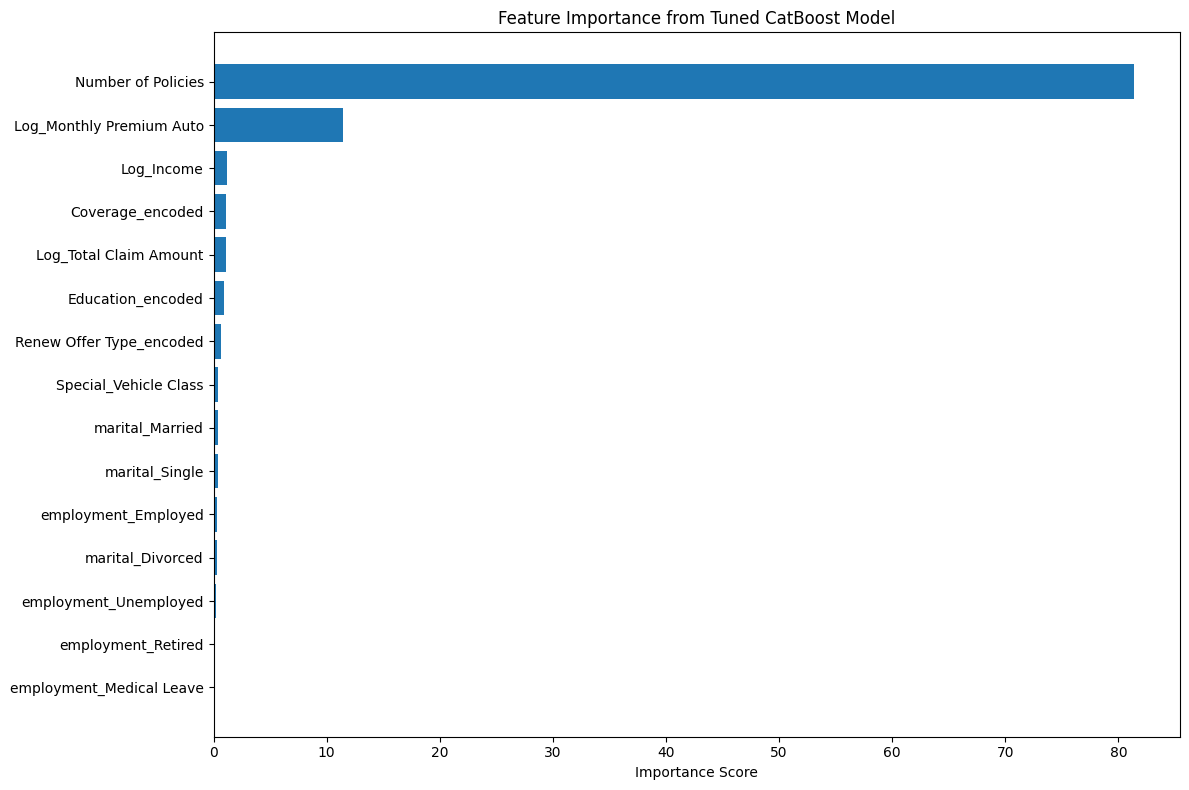

In [54]:
# Feature Importance from CatBoost model
import matplotlib.pyplot as plt

# Get feature importance from the tuned CatBoost model
feature_importance = cb_tuned.get_feature_importance()
feature_names = X_train.columns

# Create a dataframe for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Display top 15 most important features
print("Most Important Features:")
print(importance_df.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.xlabel('Importance Score')
plt.title('Feature Importance from Tuned CatBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### ***Kesimpulan***

Customer Lifetime Value menunjukkan hasil yang baik jika model prediksinya dikembangkan menggunakan model CatBoost dengan R^2 = 0.90 dan RMSE yang sangat kecil sehingga menunjukkan bahwa model ini dapat melihat hubungan yang jelas antar data prediktornya. Data yang berpengaruh terhadap nilai CLV antara lain Monthly Premium Auto dan Special Car, sehingga perusahaan perlu menaruh lebih banyak perhatian kepada customer yang memiliki premi bulanan yang lebih mahal ataupun memiliki jenis kendaraan yang spesial. Model machine learning ini memiliki perhatian fitur yang sangat tinggi terhadap Number of Policies dan Monthly Premium Auto, dan didukung dengan Income, Jenis Coverage, Total Claim, dan Education, yang berarti ada pengaruh juga dari sisi berapa policies yang dimiliki customer, berapa incomenya, apa jenis coverage yang dimiliki, total claim yang dilakukan, dan tingkat pendidikan dari customer itu sendiri.